In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm

In [2]:
training_df = pd.read_csv(os.path.join('datalake/datasets', 'train_state_CA.csv'))
training_df.head(3)

,Month-Year,Part Number,State,Units sold per Part
0,2014-04-01,DS1010,CA,2.0
1,2014-05-01,DS1010,CA,1.0
2,2014-06-01,DS1010,CA,3.0


In [3]:
df = training_df[training_df['Part Number']=='DS1011']
df.head(100)

,Month-Year,Part Number,State,Units sold per Part
45,2014-04-01,DS1011,CA,2.0
46,2014-05-01,DS1011,CA,1.0
47,2014-06-01,DS1011,CA,3.0
48,2014-07-01,DS1011,CA,0.0
49,2014-09-01,DS1011,CA,2.0
50,2014-10-01,DS1011,CA,3.0
51,2015-01-01,DS1011,CA,1.0
52,2015-02-01,DS1011,CA,2.0
53,2015-03-01,DS1011,CA,-1.0
54,2015-04-01,DS1011,CA,1.0


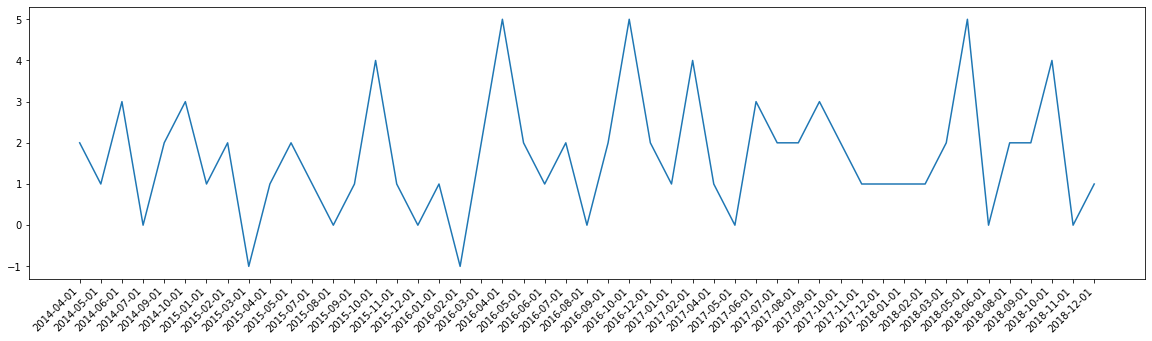

In [4]:
plt.figure(figsize=(20,5))
plt.xticks(rotation=45, ha="right")
plt.plot(df['Month-Year'], df['Units sold per Part'])

In [5]:
model = pm.auto_arima(df['Units sold per Part'], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=180.732, Time=0.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=177.406, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=179.088, Time=0.04 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=178.740, Time=0.05 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=218.085, Time=0.01 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.281 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   49
Model:                        SARIMAX   Log Likelihood                 -86.703
Date:                Wed, 06 Apr 2022   AIC                            177.406
Time:                        17:30:45   BIC                            181.190
Sample:                             0   HQIC                           178.842
                                 - 49                                         
Co

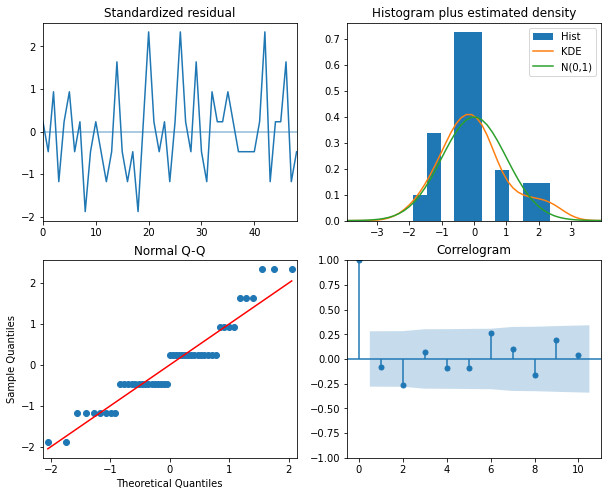

In [6]:
model.plot_diagnostics(figsize=(10,8))
plt.show()

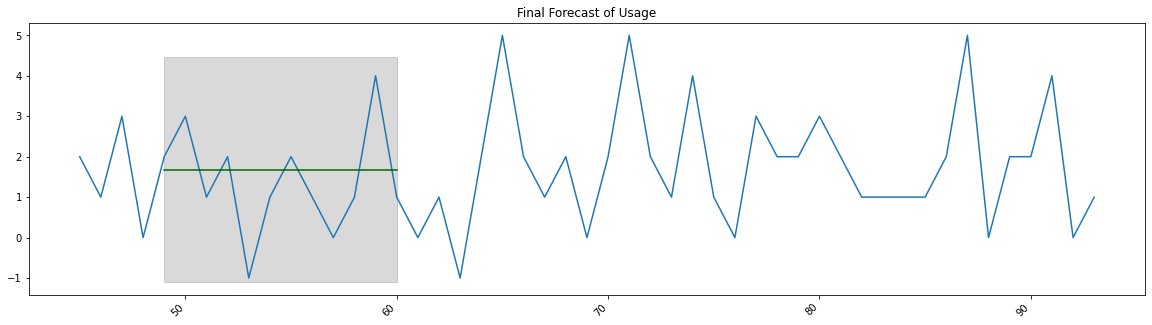

In [11]:
# Forecast
n_periods = 12
fc, confint = model.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(df['Units sold per Part']), len(df['Units sold per Part'])+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.figure(figsize=(20,5))
plt.xticks(rotation=45, ha="right")
plt.plot(df['Units sold per Part'])
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index, 
                 lower_series, 
                 upper_series, 
                 color='k', alpha=.15)

plt.title("Final Forecast of Usage")
plt.show()